## Data Analysis using Python

We get NSE stocks data using package nsepy. You will have to first install nsepy using the command pip install nsepy. 

Use function get_history, it fetches the price history of stocks/indices/derivatives and returns a pandas dataframe.

We are going to use data of 'INFY', 'HDFC', 'RELIANCE', 'WIPRO' 

We have created the dataframes hdfc, infy, wipro and reliance. 

We will use the dataframes created above to create plots.


In [1]:
pip install nsepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
import datetime as dt
%matplotlib inline

start = dt.datetime(2018, 1, 1)

end = dt.datetime.today()
start , end

hdfc = get_history(symbol='HDFC', start = start, end = end)
hdfc.index = pd.to_datetime(hdfc.index)
hdfc

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-01-01,HDFC,EQ,1710.40,1710.00,1711.05,1677.50,1688.80,1683.75,1687.66,1387222,2.341161e+14,23130,1021574,0.7364
2018-01-02,HDFC,EQ,1683.75,1690.00,1706.25,1685.40,1703.90,1703.25,1696.72,1468475,2.491589e+14,57242,1062750,0.7237
2018-01-03,HDFC,EQ,1703.25,1705.20,1711.80,1695.00,1700.80,1700.80,1705.57,2133332,3.638538e+14,64174,1698063,0.7960
2018-01-04,HDFC,EQ,1700.80,1708.95,1708.95,1691.05,1701.00,1703.20,1700.65,1585554,2.696472e+14,62081,1183815,0.7466
2018-01-05,HDFC,EQ,1703.20,1716.00,1731.00,1705.85,1729.00,1725.20,1714.69,2302884,3.948728e+14,71515,1837185,0.7978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,HDFC,EQ,1636.85,1651.95,1657.80,1628.10,1652.75,1652.00,1645.77,4046773,6.660064e+14,134783,2124259,0.5249
2020-09-28,HDFC,EQ,1652.00,1672.90,1692.60,1658.00,1685.00,1681.45,1678.77,2739071,4.598260e+14,105938,1386203,0.5061
2020-09-29,HDFC,EQ,1681.45,1692.00,1720.00,1682.10,1712.65,1713.10,1701.62,3696138,6.289407e+14,143476,2122646,0.5743


In [3]:

infy = get_history(symbol='INFY', start = start, end = end)
infy.index = pd.to_datetime(infy.index)

hdfc = get_history(symbol='HDFC', start = start, end = end)
hdfc.index = pd.to_datetime(hdfc.index)

reliance = get_history(symbol='RELIANCE', start = start, end = end)
reliance.index = pd.to_datetime(reliance.index)

wipro = get_history(symbol='WIPRO', start = start, end = end)
wipro.index = pd.to_datetime(wipro.index)


### Answer the following questions. Do remember to add appropriate title to the graphs.

#### 1. Use the dataframe open_prices created below to plot a line graph showing each of the four stocks price. Set the figure size to 15,6 for better visualization and add grids. The plot will have four lines depicting each stock and a legend.

In [4]:
open_prices = pd.concat([infy['Open'], hdfc['Open'], reliance['Open'], wipro['Open']], axis = 1)
open_prices.columns = ['Infy', 'Hdfc', 'Reliance', 'Wipro']
D1 = open_prices.reset_index()

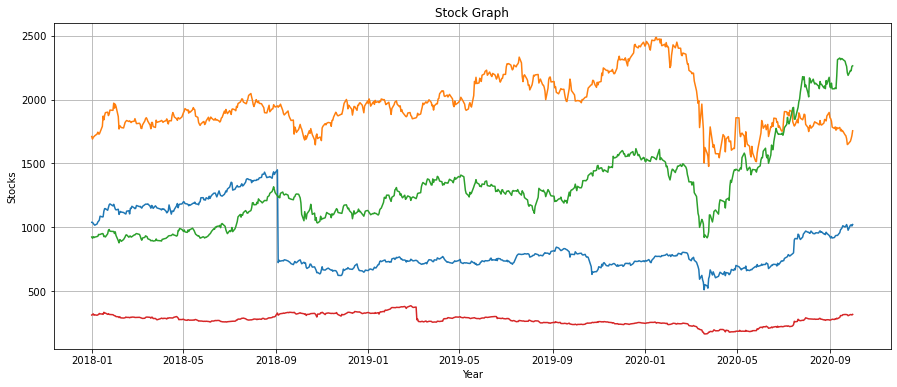

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
yAxis =D1[['Infy', 'Hdfc','Reliance', 'Wipro']]
xAxis = D1.Date
plt.plot(xAxis,yAxis)
plt.grid(True)
plt.title('Stock Graph')
plt.xlabel('Year')
plt.ylabel('Stocks')
plt.show()

#### 2. Use the dataframe open_prices created in qn 1 to create open_yearly with mean open prices every year. Create a bar chart with stock name on X-axis and price on Y-axis. The resulting plot will have multiple bar plot comparing price of each stock for 2018, 2019 and 2020. The legend should specify which colored bar represents which year for each stock.

In [41]:
open_yearly = D1
df1 = open_yearly.reset_index(level=0)
open_yearly=df1.groupby(df1.Date.dt.year).mean()
D2 = open_yearly.reset_index()
type(D2)

pandas.core.frame.DataFrame

<Figure size 1080x432 with 0 Axes>

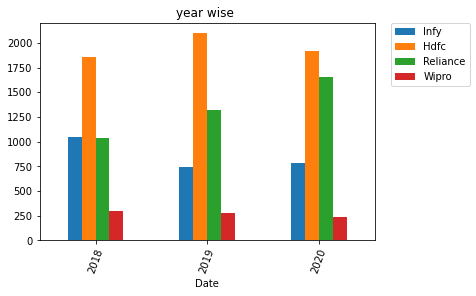

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
D2.plot.bar(x='Date', y=["Infy","Hdfc",'Reliance', 'Wipro'], rot=70, title="year wise ");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 ### 3. Plot 4 different line plots for the 4 companies in dataframe open_prices. Year would be on X-axis, stock price on Y axis, you will need (2,2) plot. Set figure size to 10, 8 and share X-axis for better visualization.

In [9]:
D1.head()

,Date,Infy,Hdfc,Reliance,Wipro
0,2018-01-01,1037.70,1710.00,922.70,311.50
1,2018-01-02,1037.25,1690.00,913.00,315.85
2,2018-01-03,1028.50,1705.20,925.00,320.40
3,2018-01-04,1021.00,1708.95,918.15,310.10
4,2018-01-05,1015.30,1716.00,921.80,313.00


<ipython-input-26-c4e62f4e56ac>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411).set_title("Infy Stock")
<ipython-input-26-c4e62f4e56ac>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(412).set_title("HDFC Stock")
<ipython-input-26-c4e62f4e56ac>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a

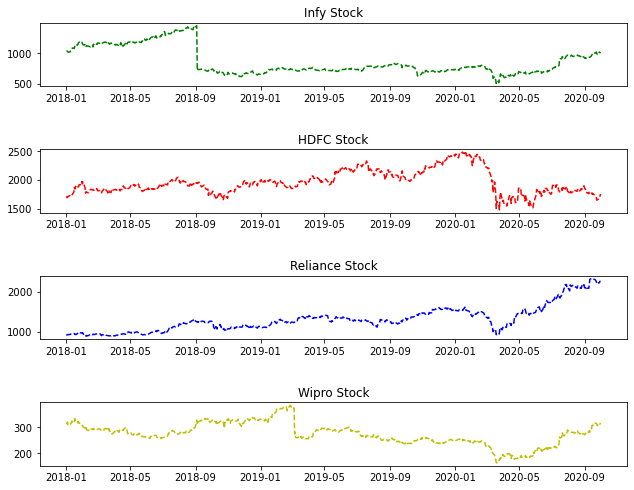

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

plt.subplot(411) 
plt.plot(D1['Date'], D1['Infy'], 'g--')
plt.subplot(411).set_title("Infy Stock")

plt.subplot(412) 
plt.plot(D1['Date'],D1['Hdfc'], 'r--')
plt.subplot(412).set_title("HDFC Stock")

plt.subplot(413) 
plt.plot(D1['Date'],D1['Reliance'], 'b--')
plt.subplot(413).set_title("Reliance Stock")

plt.subplot(414) 
plt.plot(D1['Date'],D1['Wipro'], 'y--')
plt.subplot(414).set_title("Wipro Stock")

plt.tight_layout(pad=5, h_pad=3, w_pad=2, rect=None)

#### 4. Get the stock prices for TCS for the same time period and plot a line graph with two lines representing daily high and low prices respectively.

In [34]:
TCS = get_history(symbol='TCS', start = start, end = end)
TCS.index = pd.to_datetime(TCS.index)
#TCS.head()
T1 = TCS.reset_index()
T1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2018-01-01,TCS,EQ,2701.20,2682.3,2694.8,2635.0,2650.0,2645.60,2654.94,675880,1.794418e+14,19464,330691,0.4893
1,2018-01-02,TCS,EQ,2645.60,2660.0,2669.6,2620.2,2631.0,2631.20,2641.06,960145,2.535800e+14,46813,555820,0.5789
2,2018-01-03,TCS,EQ,2631.20,2632.0,2669.0,2631.2,2639.0,2638.65,2649.21,628560,1.665186e+14,32104,361072,0.5744
3,2018-01-04,TCS,EQ,2638.65,2650.0,2662.0,2640.0,2650.0,2657.10,2649.94,456541,1.209807e+14,32647,264561,0.5795
4,2018-01-05,TCS,EQ,2657.10,2650.0,2699.5,2650.0,2695.0,2689.20,2684.95,576853,1.548821e+14,30836,318083,0.5514


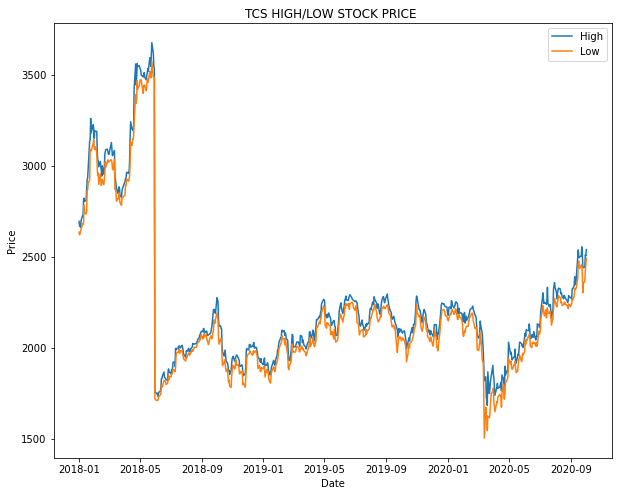

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

x1 = T1['Date']
y1 = T1['High']
# plotting the line 1 points 
plt.plot(x1, y1, label = "High")

# line 2 points
x2 = T1['Date']
y2 = T1['Low']
# plotting the line 2 points 
plt.plot(x2, y2, label = "Low")

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('TCS HIGH/LOW STOCK PRICE ')
plt.legend()
plt.show()

#### 5. Create 3 pie charts from the open_prices dataframe, each representing % mean prices of stocks per year. You should get three charts for year 2018, 2019 and 2020 respectively. Try the parameter layout = (2,2) to get 2 plots on each row.

In [43]:
open_prices.head()

,Infy,Hdfc,Reliance,Wipro
Date,,,,
2018-01-01,1037.70,1710.00,922.70,311.50
2018-01-02,1037.25,1690.00,913.00,315.85
2018-01-03,1028.50,1705.20,925.00,320.40
2018-01-04,1021.00,1708.95,918.15,310.10
2018-01-05,1015.30,1716.00,921.80,313.00


In [99]:
df2 = open_prices.reset_index(level=0)
df2

,Date,Infy,Hdfc,Reliance,Wipro
0,2018,1048.416463,1862.144512,1041.130081,297.232114
1,2019,741.081020,2096.764286,1323.192857,280.370000
2,2020,782.783421,1914.146579,1650.043421,235.731053


In [106]:
tt1=df2[['Infy','Hdfc','Reliance','Wipro']]
#open_prices=df2.groupby(df2.Date.dt.year).mean()
tt1

,Infy,Hdfc,Reliance,Wipro
0,1048.416463,1862.144512,1041.130081,297.232114
1,741.081020,2096.764286,1323.192857,280.370000
2,782.783421,1914.146579,1650.043421,235.731053


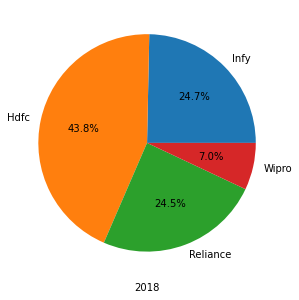

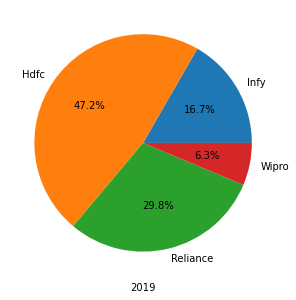

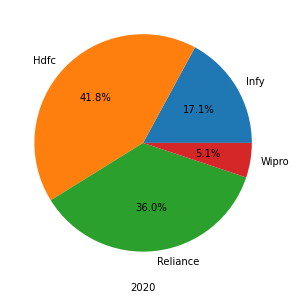

In [110]:
#fig, ax = plt.subplots(2,2 , figsize=(8,7))
listy = [2018,2019,2020]
for ind in tt1.index:
        fig, ax = plt.subplots(1,1)
        fig.set_size_inches(5,5)
        tt1.iloc[ind].plot(kind='pie', ax=ax, autopct='%1.1f%%')
        ax.set_ylabel('')
        ax.set_xlabel(listy[ind])